<a href="https://colab.research.google.com/github/anntevzik/-/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#@title Import Dependencies

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [53]:
#@title Define Hyperparameters

input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 512 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 128 # the size of input data took for one iteration
lr = 5e-4 # size of step

In [54]:
#@title Downloading MNIST data

train_data = datasets.MNIST(root='./data', train=True,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                            ]),
                            download=True)

test_data = datasets.MNIST(root='./data', train=False,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                           ]))


torch.Size([1, 28, 28]) 1


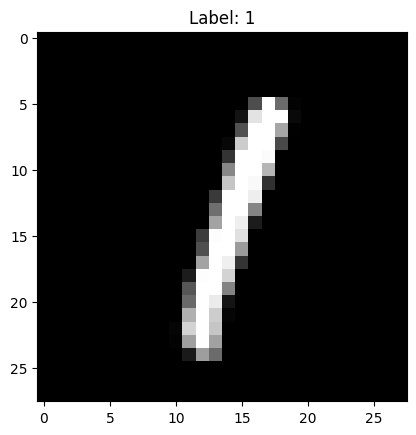

In [55]:
n = 5
data = test_data[n]
img, label = data
print(img.shape, label)
plt.imshow(img[0], cmap='gray')  # ნორმალიზირებული სურათისთვის
plt.title(f'Label: {label}')
plt.show()


In [56]:
label

1

In [57]:
#@title Loading the data

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = False)

In [58]:
#@title Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.LeakyReLU()
    self.dropout = nn.Dropout(0.3)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = x.view(x.size(0), -1)  # 28*28 flatten
    out = self.fc1(out)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [59]:
#@title Build the model

net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()
  images, labels = images.cuda(), labels.cuda()


In [60]:
#@title Define loss-function & optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=0.0005)

In [61]:
#@title Training the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_gen):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_data)//batch_size}], Loss: {loss.item():.4f}')


Epoch [1/20], Step [100/468], Loss: 0.4252
Epoch [1/20], Step [200/468], Loss: 0.4282
Epoch [1/20], Step [300/468], Loss: 0.3924
Epoch [1/20], Step [400/468], Loss: 0.2690
Epoch [2/20], Step [100/468], Loss: 0.2182
Epoch [2/20], Step [200/468], Loss: 0.2221
Epoch [2/20], Step [300/468], Loss: 0.1765
Epoch [2/20], Step [400/468], Loss: 0.1602
Epoch [3/20], Step [100/468], Loss: 0.1569
Epoch [3/20], Step [200/468], Loss: 0.2284
Epoch [3/20], Step [300/468], Loss: 0.1935
Epoch [3/20], Step [400/468], Loss: 0.1445
Epoch [4/20], Step [100/468], Loss: 0.1866
Epoch [4/20], Step [200/468], Loss: 0.0874
Epoch [4/20], Step [300/468], Loss: 0.1465
Epoch [4/20], Step [400/468], Loss: 0.1104
Epoch [5/20], Step [100/468], Loss: 0.0813
Epoch [5/20], Step [200/468], Loss: 0.1342
Epoch [5/20], Step [300/468], Loss: 0.0883
Epoch [5/20], Step [400/468], Loss: 0.1244
Epoch [6/20], Step [100/468], Loss: 0.0934
Epoch [6/20], Step [200/468], Loss: 0.0959
Epoch [6/20], Step [300/468], Loss: 0.0768
Epoch [6/20

რეალური: 4, პროგნოზი: 2
პროგნოზის ალბათობები: [1.7527290e-06 7.2449016e-09 8.9410079e-01 1.1102054e-08 1.4063710e-04
 9.7717191e-07 1.0575583e-01 1.5001266e-08 3.3452525e-11 7.2595453e-14]


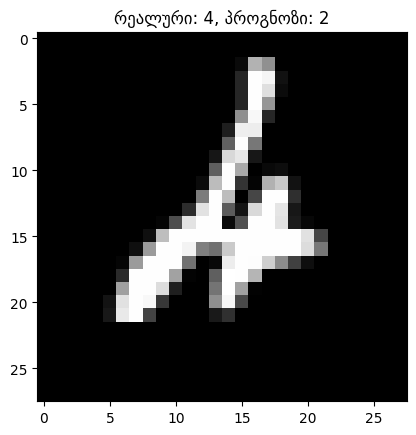

რეალური: 6, პროგნოზი: 0
პროგნოზის ალბათობები: [5.2576149e-01 9.9639416e-13 4.6263821e-07 9.5785481e-07 7.0336336e-07
 8.7820331e-04 4.7335348e-01 1.3403899e-06 3.4120565e-06 7.1954673e-09]


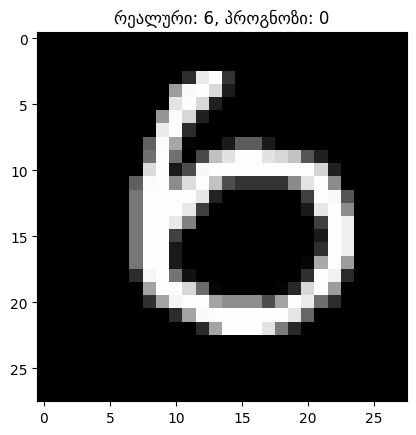

რეალური: 2, პროგნოზი: 7
პროგნოზის ალბათობები: [4.5422080e-08 3.2124583e-05 2.0143171e-01 1.2819973e-03 1.7667268e-16
 5.4434159e-09 4.9490760e-14 7.9724753e-01 6.4188043e-06 1.8309186e-07]


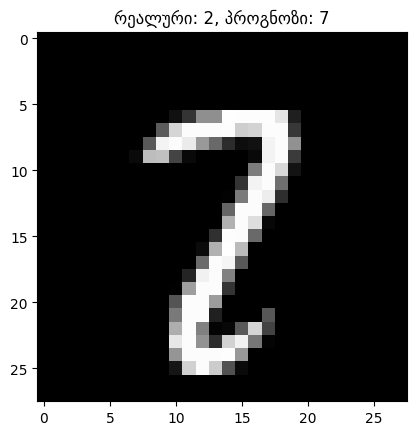

რეალური: 5, პროგნოზი: 3
პროგნოზის ალბათობები: [1.4461033e-08 3.6272514e-04 1.5992326e-07 9.6481687e-01 4.1080000e-08
 3.4797363e-02 2.1354046e-05 5.5868676e-10 1.3704914e-06 1.5970529e-07]


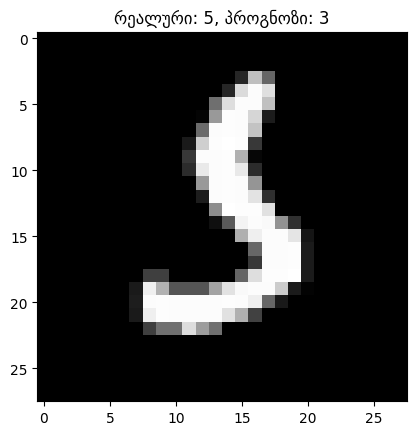

რეალური: 3, პროგნოზი: 7
პროგნოზის ალბათობები: [1.7958878e-06 4.1001298e-05 1.6087753e-04 3.0524552e-01 1.3128793e-07
 2.9309531e-08 2.3129210e-06 6.9416034e-01 1.8211791e-08 3.8798284e-04]


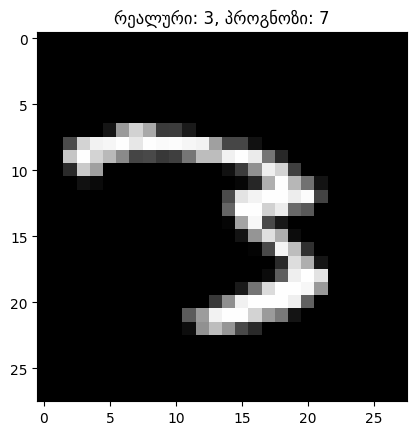

Accuracy of the model: 98.15 %


In [67]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)
net.eval()

num_errors_to_show = 5  # რამდენი შეცდომით სურათი გვინდა
errors_shown = 0

with torch.no_grad():
    for images, labels in test_gen:
        images = images.view(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = net(images)
        probs = F.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                print(f"რეალური: {labels[i].item()}, პროგნოზი: {predicted[i].item()}")
                print("პროგნოზის ალბათობები:", probs[i].cpu().numpy())
                plt.imshow(images[i].cpu().view(28,28), cmap='gray')
                plt.title(f"რეალური: {labels[i].item()}, პროგნოზი: {predicted[i].item()}")
                plt.show()
                errors_shown += 1
                if errors_shown >= num_errors_to_show:
                    break
        if errors_shown >= num_errors_to_show:
            break

print(f'Accuracy of the model: {accuracy:.2f} %')
